#### loading the libraries

In [3]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

### Problem Statement: Zomato User Prediction across the world
#### Objective:
Predict user preferences on Zomato based on aggregated restaurant ratings across different countries
#### Problem Description:
The goal is to analyze and predict user preferences on Zomato based on aggregated restaurant ratings across different countries. We aim to identify patterns and trends in customer satisfaction for various regions, focusing on how factors such as cuisine, price range, and votes influence ratings. This analysis will provide actionable insights for restaurant owners to enhance their offerings and tailor their strategies to effectively meet regional customer expectations. The model's predictions will enable Zomato to better understand user preferences globally and improve the customer experience.


##### Features in the Dataset:
1. Restaurant ID & Name: Unique identifiers for each restaurant.
2. Country Code & City: Geographic location data.
3. Locality & Address: Specific address and area details.
4. Longitude & Latitude: Geographic coordinates.
5. Cuisines: Type of cuisine(s) offered.
6. Currency: The currency used for transactions.
7. Has Table Booking: Indicates whether table booking is available.
8. Has Online Delivery: Indicates whether online delivery is available.
9. Is Delivering Now: Current delivery status.
10. Price Range: Price level of the restaurant.
11. Aggregate Rating (Target Variable): Overall rating of the restaurant by customers.
12. Rating Color & Text: Visual and textual representations of the rating.
13. Votes: Number of customer votes received.

In [5]:
df1 = pd.read_csv(r"/Users/jennifer/Downloads/5-Days-Live-EDA-and-Feature-Engineering-main/Zomatodataset/zomato.csv",encoding= 'latin-1')

In [7]:
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


#### Understanding about the dataset

In [9]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
df1.shape

(9551, 21)

In [203]:
df2 = pd.read_excel(r"/Users/jennifer/Downloads/5-Days-Live-EDA-and-Feature-Engineering-main/Zomatodataset/Country-Code.xlsx")

df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


#### Merging two dataset 
As the country code and country name is related to each other

In [205]:
df =pd.merge(df1,df2, on ='Country Code', how = 'left')

In [207]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [209]:
df.shape

(9551, 22)

In [211]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### In Data Analysis What All Things We Do
1.Missing Values

2.Explore About the Numeric Variables

3.Explore About Categorical  Variables

4.Finding Relationship Between Features

In [215]:
df.isnull().sum() # to find out the missing values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<Axes: >

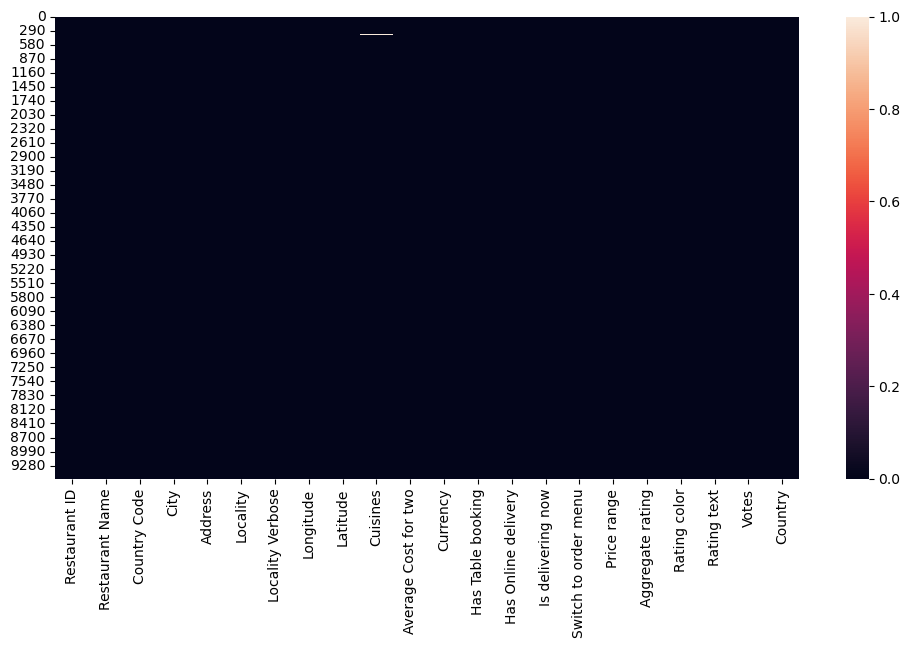

In [217]:
sns.heatmap(df.isnull()) # another method to see missing values using heatmap

# here the null values are very less because
There are 9551 records, so it is not showing the null 9 record


In [219]:
null_cols=df.isnull().sum()
null_cols[null_cols>0]

Cuisines    9
dtype: int64

In [221]:
for i in ['Cuisines']:
    a=df[i].mode()[0]
    df[i].fillna(a,inplace=True)


In [223]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [227]:
df[df.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


In [229]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#### correlation
We use correlation in this dataset to identify the relationships between variables and understand how changes in one variable might influence others, especially the target variable (aggregate rating). This insight helps in feature selection, guiding us on which features are more important for the model and should be prioritized.

In [231]:
df[['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


#### Observation

#### 1. Strongest Correlations
Price Range and Aggregate Rating (0.437944):
Indicates a moderate positive correlation. Higher price ranges tend to be associated with better aggregate ratings, possibly due to premium services or higher-quality offerings.
Votes and Aggregate Rating (0.313691):
Shows a moderate positive correlation. Restaurants with higher votes often receive better ratings, reflecting customer satisfaction and engagement.

#### 2.Moderate Correlations
Price Range and Votes (0.309444):
Suggests that restaurants with higher price ranges receive more votes. This could indicate that premium or high-cost restaurants attract more customer attention.
Country Code and Aggregate Rating (0.282189):
Reflects that location (country) plays a role in determining aggregate ratings. Some regions might have inherently higher-rated restaurants due to cultural preferences or quality standards.
#### 3. Weak/Negligible Correlations
Latitude and Aggregate Rating (0.000516):
Virtually no correlation. The geographic latitude of a restaurant does not influence its ratings.
Longitude and Aggregate Rating (-0.116818):
Weak negative correlation. The longitude might have a slight influence due to clustering of restaurants in specific regions, but it's minimal.
#### 4.Negative Correlations
Restaurant ID and Aggregate Rating (-0.326212):
A moderate negative correlation. This might indicate that newer restaurants (higher IDs) generally have lower ratings, possibly due to fewer votes or less experience.
Restaurant ID and Votes (-0.147023):
Weak negative correlation. Older restaurants (lower IDs) might have accumulated more votes over time.


<Axes: >

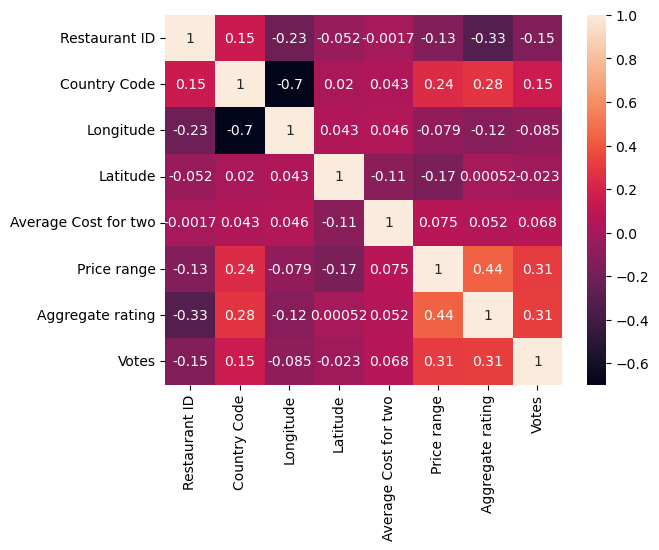

In [43]:
sns.heatmap(df[['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr(),annot=True)


#### Observations:
From the heatmap, the features most correlated with "Aggregate rating" are:

1)Price range → 0.44 (Moderate positive correlation)

2)Votes → 0.31 (Moderate positive correlation)

3)Country Code → 0.28 (Weak positive correlation)


In [45]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [47]:
df.drop(['Country Code'],axis=1,inplace=True)

In [49]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [51]:
df

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


### UNIVARIATE ANALYSIS

<Axes: xlabel='Aggregate rating'>

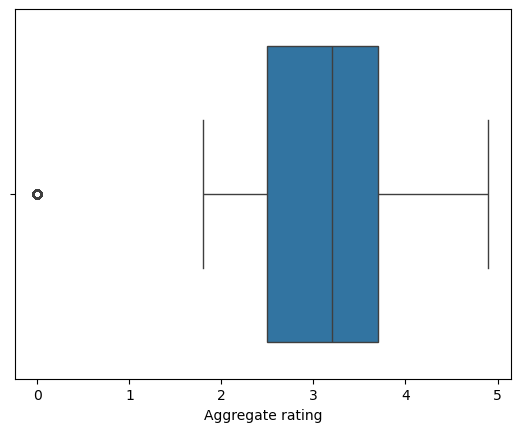

In [53]:
sns.boxplot(x=df['Aggregate rating'])

#### Observations:
Boxplot Analysis of "Aggregate rating"

Median Rating (~3.5):

The middle line in the box represents the median (around 3.5), meaning 50% of restaurants have ratings below this value.

Interquartile Range (IQR):

The box extends from Q1 (~2.5) to Q3 (~4.5), meaning most ratings fall between this range.

Restaurants typically have ratings between 2.5 and 4.5.

Outliers:

A single low outlier (~0) is present. This could be restaurants that received no reviews or extremely poor ratings.


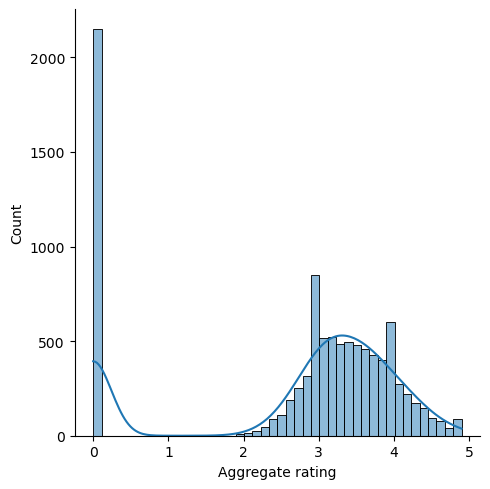

In [55]:
sns.displot(df['Aggregate rating'],kde = True)

##### The data is not normally distributed and might need transformation 

(array([2148.,    0.,    0.,    3.,  183., 1247., 2490., 2100., 1079.,
         301.]),
 array([0.  , 0.49, 0.98, 1.47, 1.96, 2.45, 2.94, 3.43, 3.92, 4.41, 4.9 ]),
 <BarContainer object of 10 artists>)

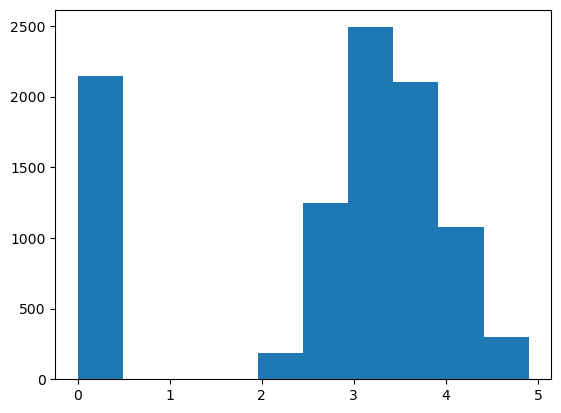

In [57]:
plt.hist(df['Aggregate rating'])

#### Observation:
There is a large spike at 0 (many restaurants have no ratings).

The second peak is around 3-4.5, meaning most rated restaurants have average to good ratings.

#### Observation
maximum no of transcations of zomato happens in India( zomato users), In canada they don't use zomato .

Text(0.5, 1.0, 'Restaurants provides Table Booking or Not')

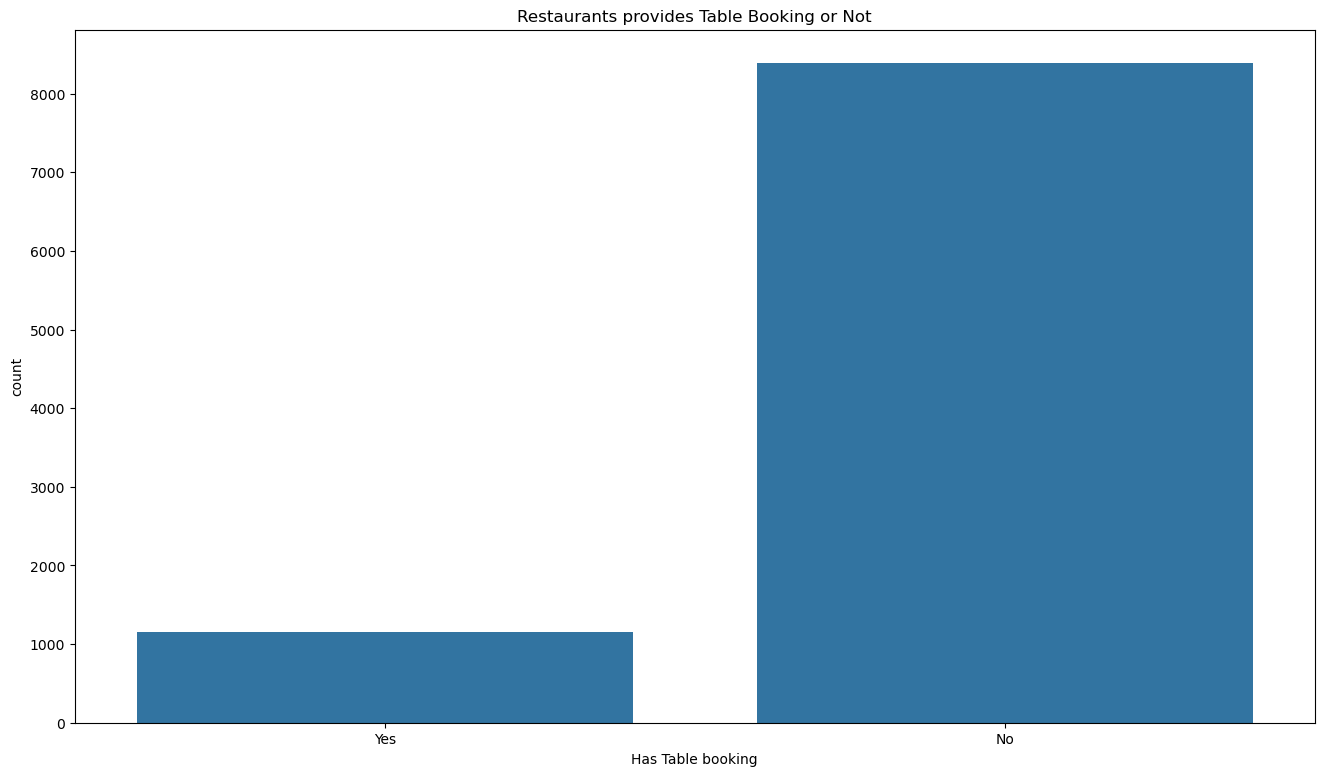

In [65]:
##plot of the restaurants that provide table booking or not
 
plt.figure(figsize=(16,9))
sns.countplot(x = 'Has Table booking', data = df)
plt.title('Restaurants provides Table Booking or Not')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

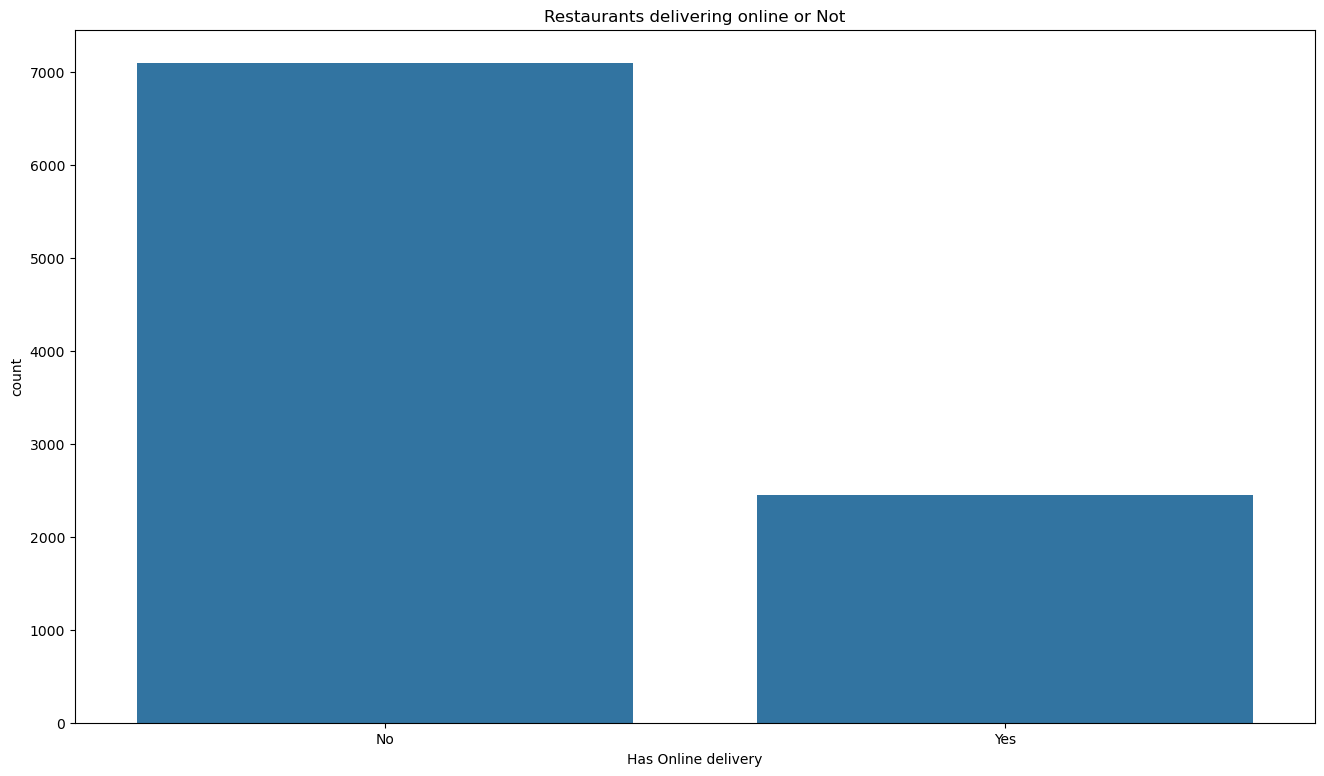

In [67]:
# Plot of the Restaurant, whether they are accepting the online_order or not 

plt.figure(figsize=(16,9))
sns.countplot(x = 'Has Online delivery', data = df)
plt.title('Restaurants delivering online or Not')

In [69]:
df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

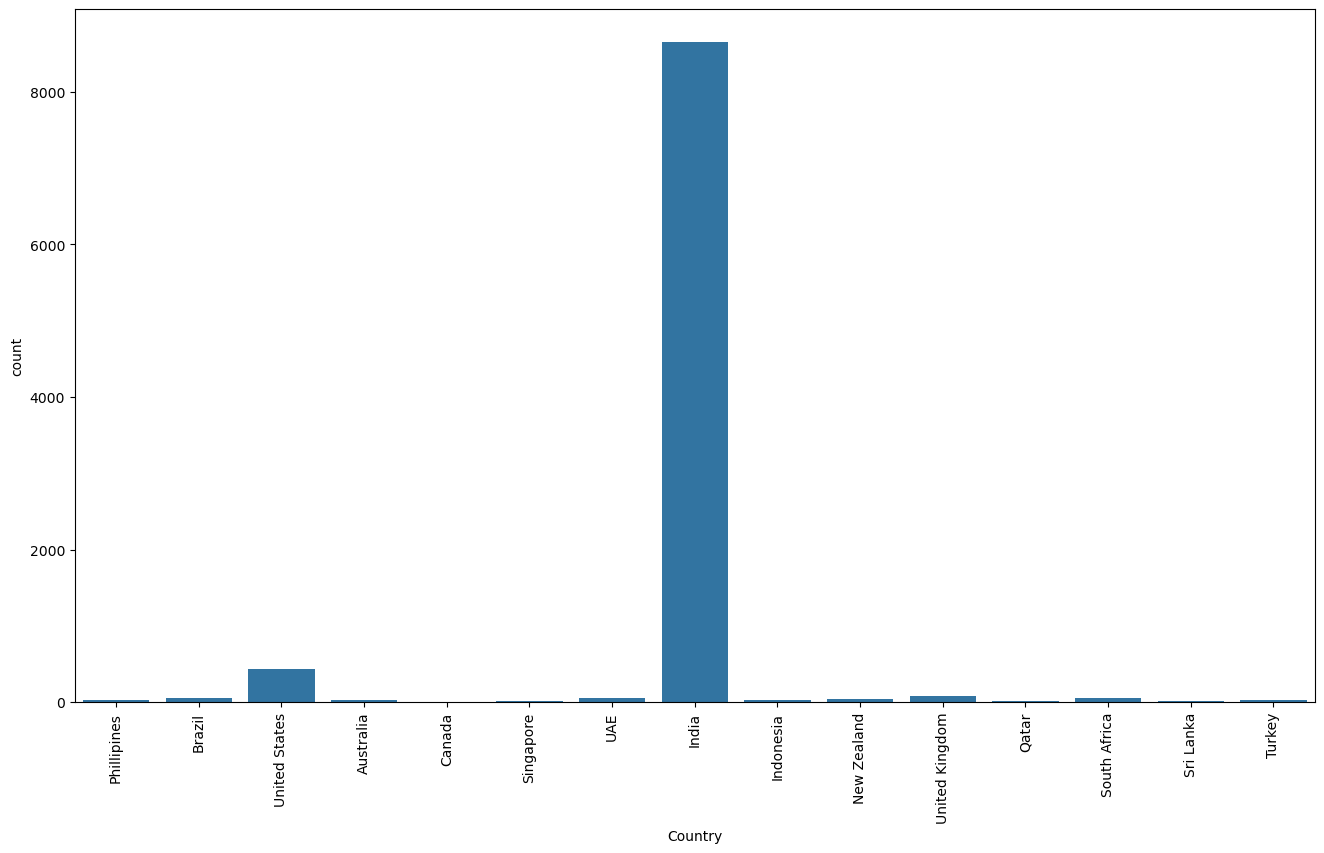

In [249]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Country',data = df)
plt.xticks(rotation=90)
plt.show()

#### Observation
maximum no of transcations of zomato happens in India( zomato users), In canada they don't use zomato .


In [73]:
country_names = df.Country.value_counts()
country_names 

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [75]:
country_names = df.Country.value_counts().index
country_names 

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [77]:
country_values=df.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

#### the reason I am doing above to plot on pie chart

([<matplotlib.patches.Wedge at 0x15dcd88f0>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.47713249041582306, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

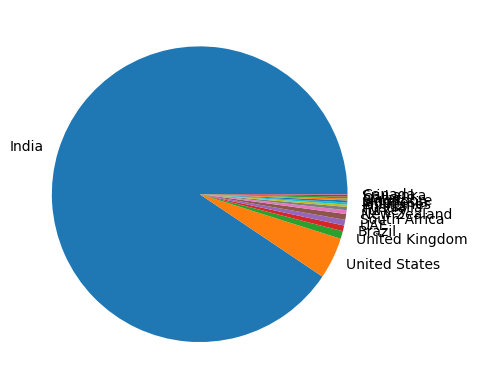

In [79]:
plt.pie(country_values,labels =country_names)

([<matplotlib.patches.Wedge at 0x15dc28fe0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

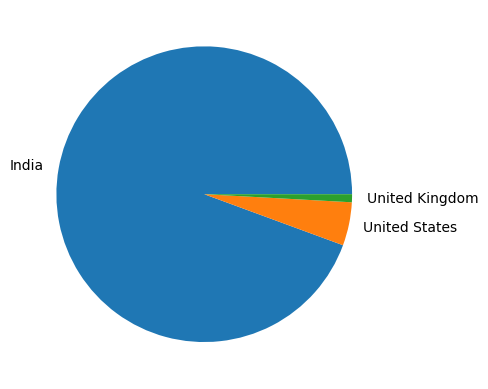

In [81]:
# above graph is looking very conjusted so now I am looking for top 3 countries
plt.pie(country_values[:3],labels =country_names[:3])


In [122]:
# now I want to see in percentage

([<matplotlib.patches.Wedge at 0x15dbbec00>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

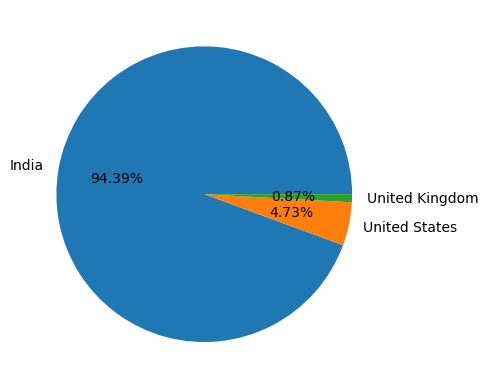

In [83]:
plt.pie(country_values[:3],labels =country_names[:3],autopct='%1.2f%%')

##### 94.39% zomato users are in india ,0.87% of zomato users are in united kingdom and 4.73% of zomato users are in United states

#### Observation:
 Zomato maximum records or transaction are from India After that USA and then United Kingdom

In [255]:
df.columns # now I am going to check rating and its count

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [87]:
df.groupby(['Aggregate rating','Rating color','Rating text'])

In [89]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [91]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()
# here it created another column

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [93]:
# to name the new column
df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [95]:
ratings = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### Observation

1. when rating is between 4.5 to 4.9 ---> Excellent 
2. when ratings are between 4.0 to 3.4 --->  very good 
3. when rating is between 3.5 to 3.9 ---> good 
4. when ratings is between 3.0 to  3.4 ----> Average
5. When the rating is between 2.5 to 2.9 ---->average
6. When the rating is between 2.4 to 2.9 ---->average
7. When the rating is between 2.0 to 2.4 ---->poor

In [97]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


### BI-VARIATE ANALYSIS

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

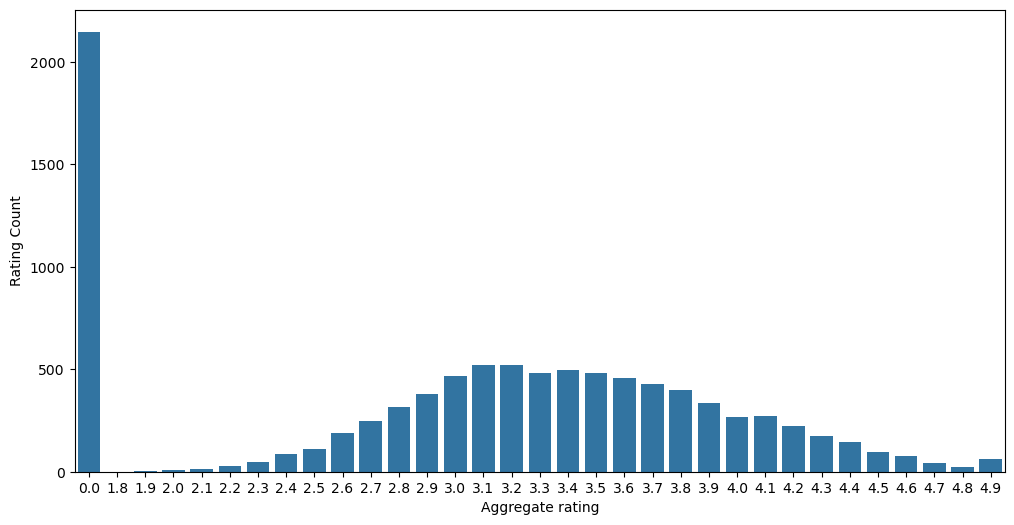

In [99]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating Count', data = ratings)

####  there they mention same ratings colour so we change according to it

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

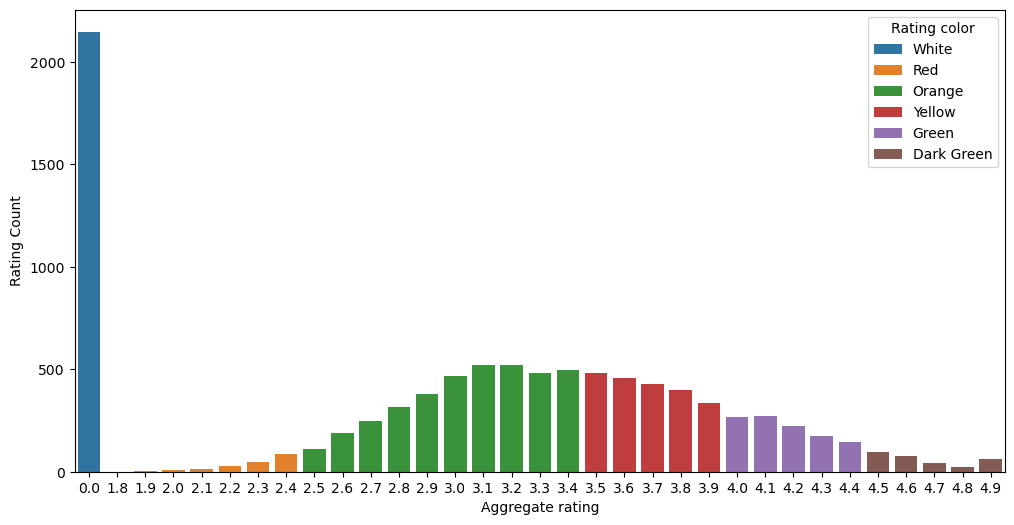

In [101]:
sns.barplot(x='Aggregate rating',y='Rating Count', hue = 'Rating color',data = ratings)

####  but here it does not show the same colour in data set

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

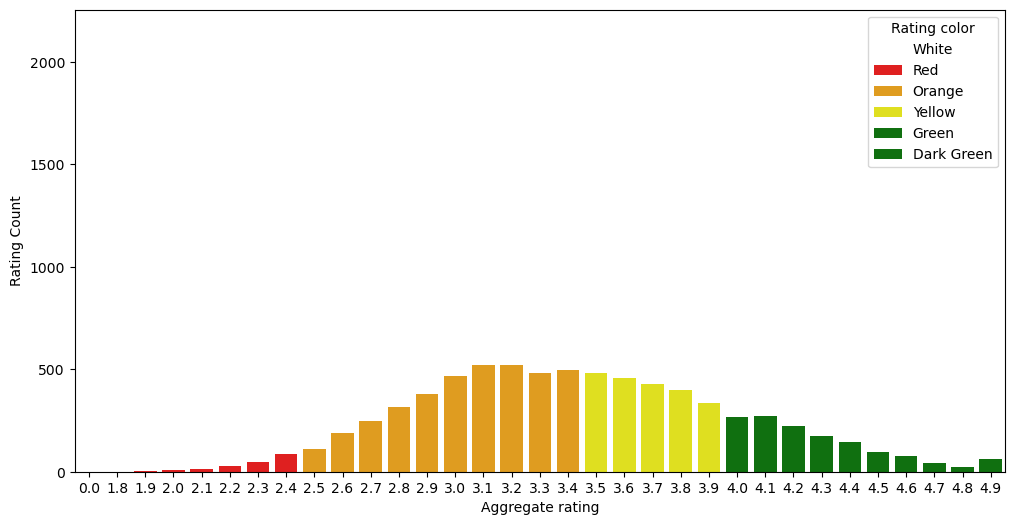

In [103]:
sns.barplot(x='Aggregate rating',y='Rating Count', hue = 'Rating color',data = ratings,palette = ['white','red','orange','yellow','green','green'])

#### Observation:
1)Not rated count is very high

2)maximum number of ratings are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

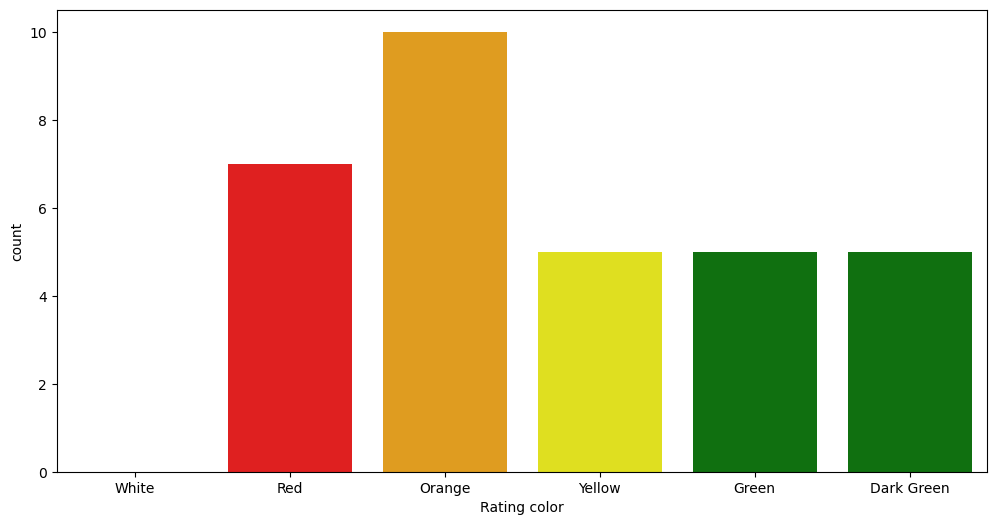

In [105]:
sns.countplot(x='Rating color',data = ratings, palette = ['white','red','orange','yellow','green','green'])

In [244]:
# comparing countries and their rating
df.groupby('Country')['Aggregate rating'].mean()

Country
Australia         3.658333
Brazil            3.763333
Canada            3.575000
India             2.523324
Indonesia         4.295238
New Zealand       4.262500
Phillipines       4.468182
Qatar             4.060000
Singapore         3.575000
South Africa      4.210000
Sri Lanka         3.870000
Turkey            4.300000
UAE               4.233333
United Kingdom    4.087500
United States     4.004378
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Country', ylabel='Aggregate rating'>

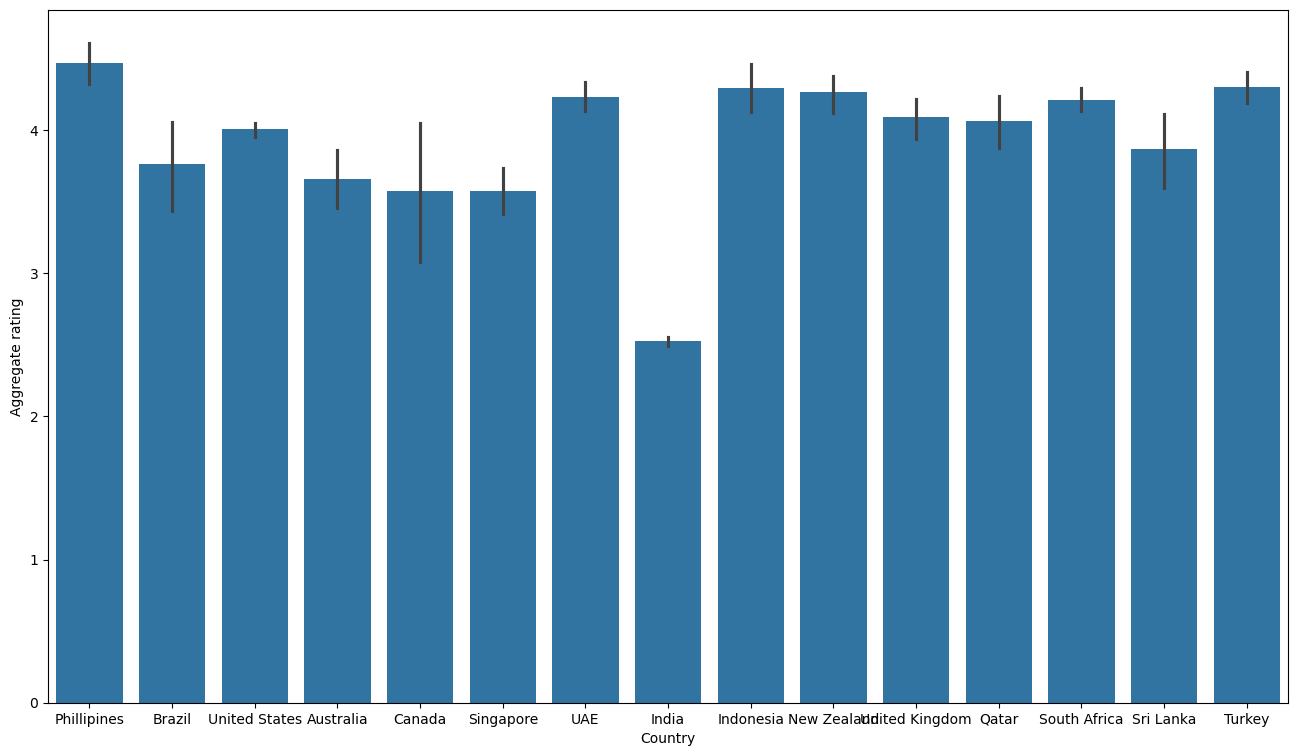

In [246]:
plt.figure(figsize=(16,9))
sns.barplot(x='Country',y='Aggregate rating',data=df)

In [107]:
# comparing online orders vs average rating

df.groupby('Has Online delivery')['Aggregate rating'].mean()

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Has Online delivery', ylabel='Aggregate rating'>

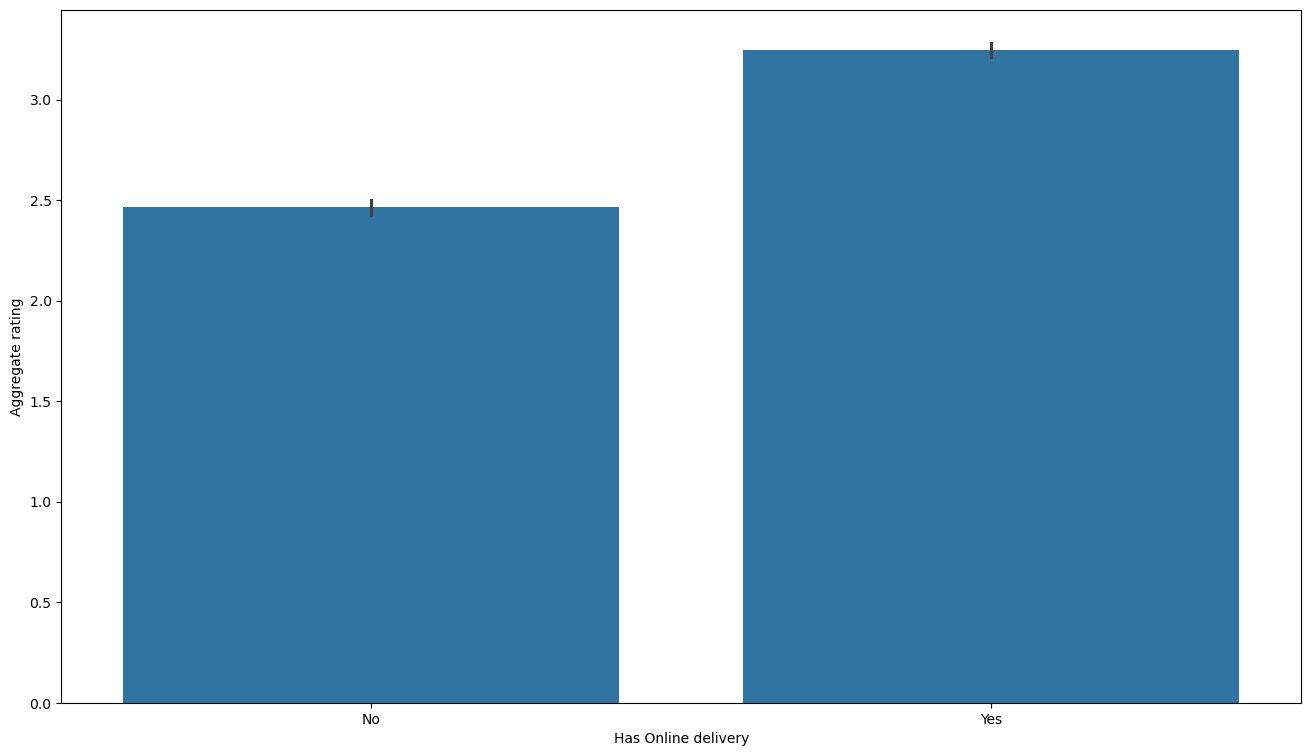

In [109]:
plt.figure(figsize=(16,9))
sns.barplot(x='Has Online delivery',y='Aggregate rating',data=df)

In [111]:
# comparing Table booking vs average rating

df.groupby('Has Table booking')['Aggregate rating'].mean()

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Has Table booking', ylabel='Aggregate rating'>

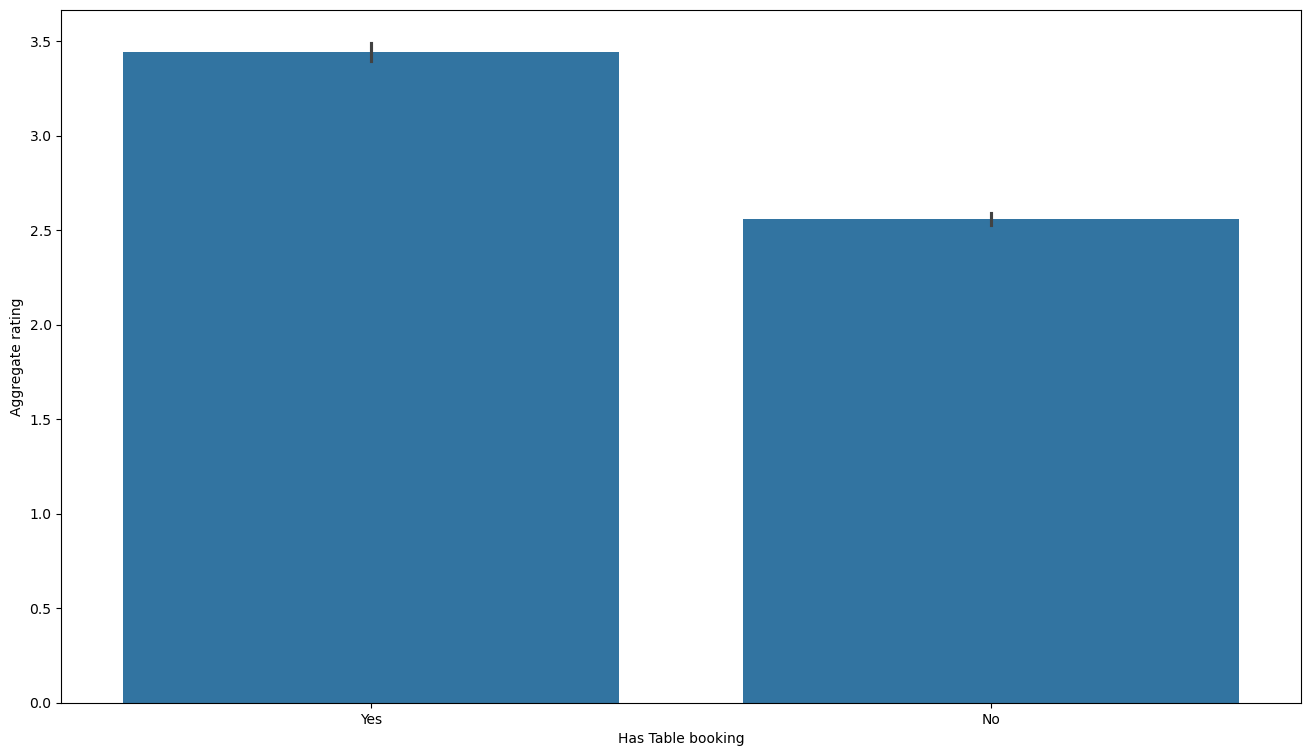

In [113]:
plt.figure(figsize=(16,9))
sns.barplot(x='Has Table booking',y='Aggregate rating',data=df)

Text(0.5, 0, 'Number of Outlets')

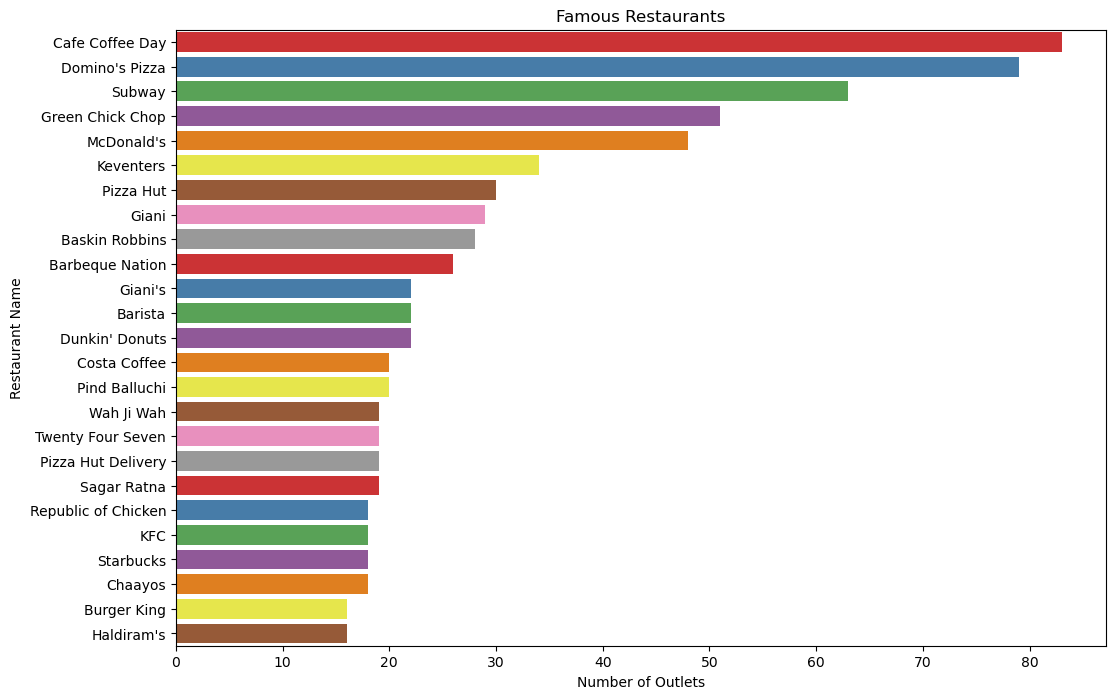

In [247]:
# Plotting for the Top Restuarant

plt.figure(figsize=(12,8))
val = df['Restaurant Name'].value_counts()[:25]  # Considering for the top 25 restaurants
sns.barplot(x=val, y=val.index, palette = "Set1")
plt.title("Famous Restaurants")
plt.xlabel("Number of Outlets")

#### Visualizing Top Cuisines

In [115]:
dk = df[['Cuisines', 'Votes']]
dj = dk.groupby(['Cuisines'])['Votes'].sum()
dj = dj.to_frame()
dj = dj.sort_values('Votes', ascending=False)
dj.head()

,Votes
Cuisines,
"North Indian, Mughlai",53747
North Indian,48967
"North Indian, Chinese",42012
Cafe,30657
Chinese,21925


#### According to the above analysis we can see that North indian meals and chinese has highest votings

In [117]:
# find the countries name  that has given 0 ratings
df[df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


#### Observations: 
maximum number of 0 ratings are from Indian customers

In [119]:
# find out which currency is used by which country
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [121]:
df[['Currency','Country']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [123]:
# which country do have online delivery
df.groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


#### Observations:

Online deliveries are availabe in india and UAE

### Create a pie Chart for cities distribution

In [125]:
city_values =df.City.value_counts().values
city_values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

In [127]:
city_labels=df.City.value_counts().index
city_labels

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

([<matplotlib.patches.Wedge at 0x15ea4bad0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

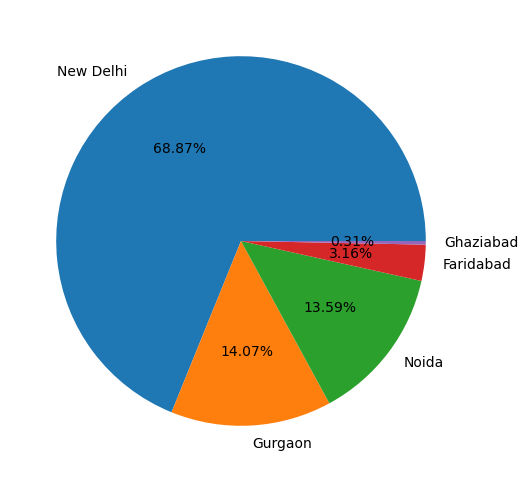

In [129]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct = '%1.2f%%')


In [131]:
df.Cuisines.unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [133]:
df['Cuisines'].isnull().sum()

0

In [135]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [137]:
df_copy=df.copy(deep=True)

#### Label Encoding

In [139]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [141]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')

In [143]:
le = LabelEncoder()

In [145]:
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [147]:
df

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,73,8685,171,172,121.027535,14.565443,920,1100,...,1,0,0,0,3,4.8,0,1,314,6
1,6304287,3173,73,6055,593,601,121.014101,14.553708,1111,1200,...,1,0,0,0,3,4.5,0,1,591,6
2,6300002,2897,75,4684,308,314,121.056831,14.581404,1671,4000,...,1,0,0,0,4,4.4,1,5,270,6
3,6318506,4707,75,8690,862,875,121.056475,14.585318,1126,1500,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,75,8689,862,875,121.057508,14.584450,1122,1500,...,1,0,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,140,5926,517,523,28.977392,41.022793,1813,80,...,0,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,140,5962,552,558,29.041297,41.009847,1824,105,...,0,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,140,5966,554,561,29.034640,41.055817,1110,170,...,0,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,140,5967,554,561,29.036019,41.057979,1657,120,...,0,0,0,0,4,4.0,1,5,901,11


In [149]:
df_copy

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [151]:
x = df.drop('Aggregate rating',axis = 1)
y = df['Aggregate rating']


In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,train_size = 0.8,random_state=0)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
model1 = LinearRegression()

In [157]:
model1.fit(x_train,y_train)

LinearRegression()

In [159]:
y_train_pred= model1.predict(x_train)
y_test_pred = model1.predict(x_test)

In [161]:
from sklearn.metrics import r2_score

In [163]:
r2_score(y_train,y_train_pred)

0.48562966028522925

In [165]:
r2_score(y_test,y_test_pred)

0.4994792783063987

#### Training R² Score: 0.486
This indicates that the model explains about 48.6% of the variance in the training dataset. While the score is moderate
#### Testing R² Score: 0.499
The testing score is slightly higher than the training score, which is unusual but not necessarily problematic. It might indicate that the model is not overfitting, but it could also reflect randomness or inadequacy in capturing relationships during training.

In [167]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()

In [169]:
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [171]:
y_train_pred=model2.predict(x_train)
y_test_pred=model2.predict(x_test)


In [173]:
r2_score(y_train,y_train_pred)

1.0

In [175]:
r2_score(y_test,y_test_pred)

0.9783072306439695

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
model3=RandomForestRegressor(n_estimators=500,max_depth=3)

In [181]:
model3.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [183]:
y_train_pred=model3.predict(x_train)
y_test_pred=model3.predict(x_test)

In [185]:
r2_score(y_train,y_train_pred)

0.9808825150516464

In [187]:
r2_score(y_test,y_test_pred)

0.9819137839443355

The Random Forest Regressor performed exceptionally well, achieving an R² score of 0.981 on training data and 0.982 on testing data, indicating strong predictive accuracy and generalization. 

#### Conclusion
Zomato heavily depend on customer ratings to attract new patrons and refine their services. By analyzing the dataset, we identified key features such as price range, votes, and location as significant factors influencing aggregate ratings. Using regression models, we successfully predicted Zomato ratings with high accuracy, with the Random Forest Regressor emerging as the best-performing model, achieving an R² score of 0.982 on test data. This model provides zomato to predict ratings and understand customer preferences. Insights derived from the model can guide strategic decisions in pricing, service enhancements, and targeted marketing, ultimately enabling zomato to improve customer satisfaction and competitiveness.